In [1]:
from keras.models import *
import numpy as np
# import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import time

def millis():
    return int(round(time.time() * 1000))

Using TensorFlow backend.
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/py

In [15]:
from Models.refinenet.refinennet_model import *
model = Refinenet()
run_model = model.chose_model(0)[0]
run_model.load_weights('./Checkpoints/refine30.h5')
run_model.summary()

Model: "lightweight_refinenet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 240, 320, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_23 (ZeroPadding2 (None, 246, 326, 3)  0           input_12[0][0]                   
__________________________________________________________________________________________________
res_b_0_conv (Conv2D)           (None, 120, 160, 64) 9472        zero_padding2d_23[0][0]          
__________________________________________________________________________________________________
res_b_0_batch (BatchNormalizati (None, 120, 160, 64) 256         res_b_0_conv[0][0]               
______________________________________________________________________________

In [7]:
model = Refinenet(n_classes= 2)
trans_model = model.chose_model(0)[0]
trans_model.summary()

Model: "lightweight_refinenet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 240, 320, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_15 (ZeroPadding2 (None, 246, 326, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
res_b_0_conv (Conv2D)           (None, 120, 160, 64) 9472        zero_padding2d_15[0][0]          
__________________________________________________________________________________________________
res_b_0_batch (BatchNormalizati (None, 120, 160, 64) 256         res_b_0_conv[0][0]               
______________________________________________________________________________

Text(0.5, 1.0, 'Predict car')

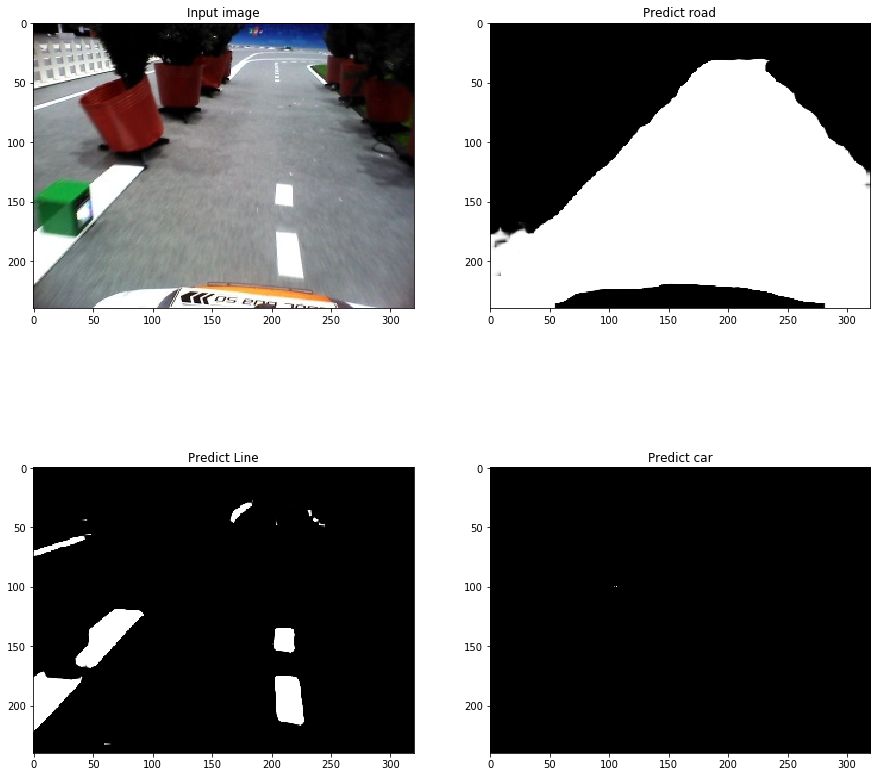

In [20]:
rand = np.random.randint(97)
count = 0
for iii in os.listdir('./Data/Nhatrang/Road/Test img/'):
    if count < rand:
        count += 1
        continue
    else:
        img = cv2.imread('./Data/Nhatrang/Road/Test img/' + iii)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        break
        
img = img/255
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.imshow(img.astype('float'))
plt.title('Input image')
img = np.expand_dims(img, 0)
pred = run_model.predict(img)

plt.subplot(2, 2, 2)
plt.imshow(pred[0][:, :, 0].astype('float'), 'gray')
plt.title('Predict road')

plt.subplot(2, 2, 3)
plt.imshow(pred[0][:, :, 1].astype('float'), 'gray')
plt.title('Predict Line')

plt.subplot(2, 2, 4)
plt.imshow(pred[0][:, :, 3].astype('float'), 'gray')
plt.title('Predict car')

In [23]:
for i in range(126):
    print('Trasfering layer {}'.format(i), end='\r')
    trans_model.layers[i].set_weights(run_model.layers[i].get_weights())

In [24]:
trans_model.save('./Checkpoints/cvtn_refine.h5')